In [37]:
print('fucku')

fucku


In [5]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
%run ../src/models/section_series.py
%matplotlib inline

In [2]:
series_loader = SectionSeriesLoader(
    img_shape=(200, 200),
    SRC_PATH='../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/*.npz')

## Haiti Series

In [24]:
%%time
haiti_series = series_loader.load({'lat':18.53,'lng':-72.34})

Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F101993.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121994.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121995.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121996.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141997.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141998.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141999.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F142000.v4b_web.stable_lights.avg_vis.tif.npz
Loading 

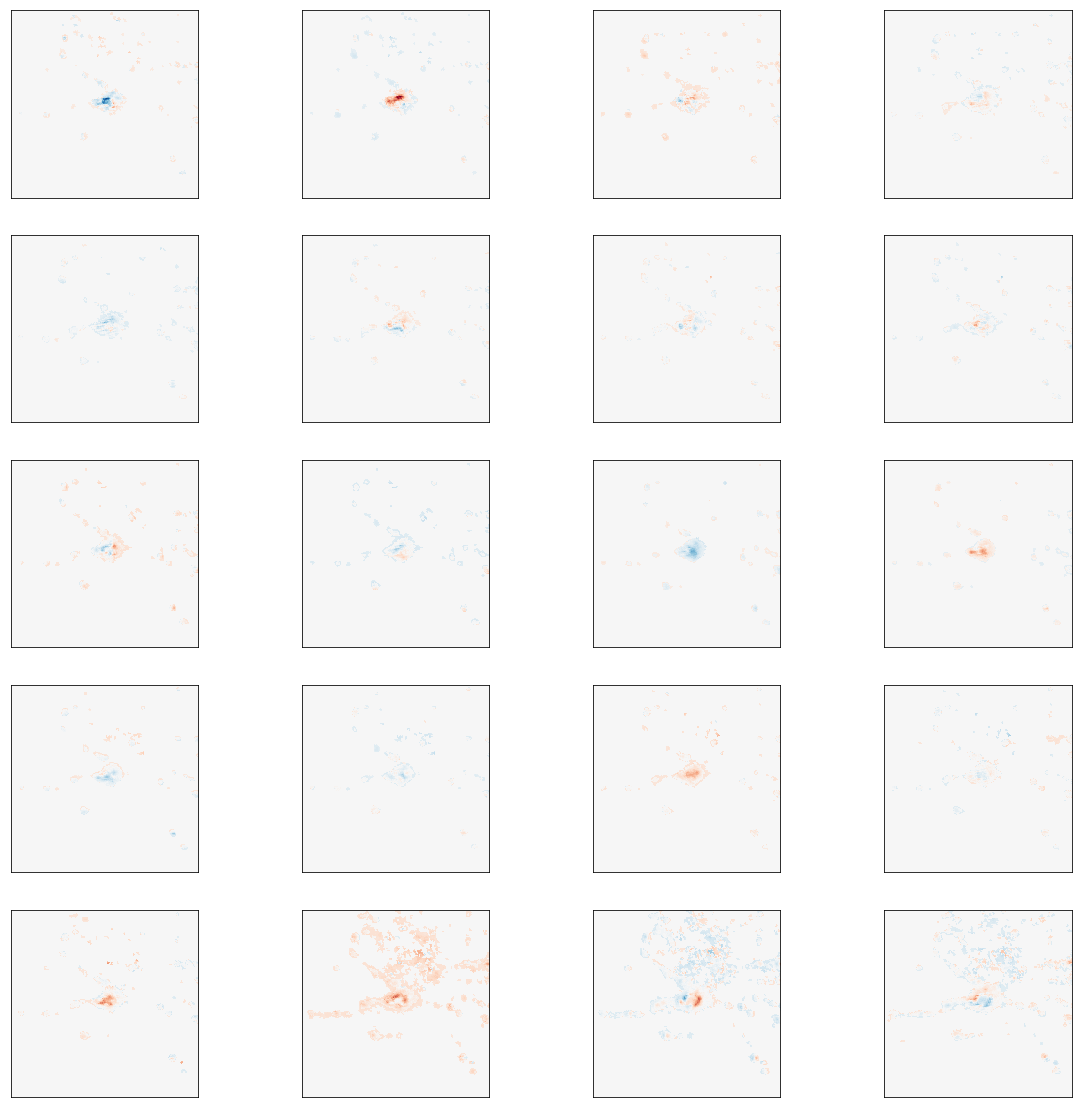

In [29]:
def plot_series(series):
    max_abs = max(abs(series.max()), abs(series.min()))
    fig, ax = plt.subplots(5,4,figsize=(20,20))
    for i, axi in enumerate(ax.flat):
        axi.imshow(series[i], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
        axi.set(xticks=[], yticks=[])

    plt.show()
plot_series(haiti_series)

In [30]:
haiti_series_means = haiti_series.mean(axis=(1,2))
haiti_series_means

array([  3.05000000e-03,  -4.42500000e-03,  -1.33050000e-01,
        -2.05000000e-03,   9.91500000e-02,  -1.45000000e-02,
        -1.47250000e-02,   1.70000000e-02,  -1.00700000e-01,
         9.75250000e-02,   7.52000000e-02,  -6.26500000e-02,
         3.50000000e-04,   5.96750000e-02,  -1.30250000e-01,
        -1.50000000e-04,  -7.87500000e-02,  -6.90850000e-01,
         1.82125000e-01,   8.46250000e-02,   3.50750000e-02])

In [31]:
df_haiti_series = pd.DataFrame({
    'mean_change': haiti_series_means
}, index=range(1993,2014))
df_haiti_series.head()

,mean_change
1993,0.003050
1994,-0.004425
1995,-0.133050
1996,-0.002050
1997,0.099150


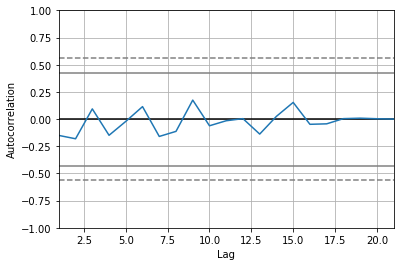

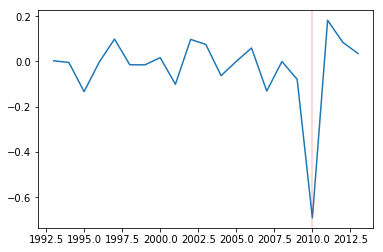

In [32]:
autocorrelation_plot(df_haiti_series['mean_change'])
plt.show()
plt.plot(df_haiti_series['mean_change'])
plt.axvline(x=2010, c='r', lw=.3)
plt.show()
None

## Multiple Series

In [33]:
earthquakes = pd.read_csv('../data/raw/USGSEarthquakeHazards/USGSEarthquakeHazards.csv', index_col=0)
earthquakes[['time', 'place', 'mag']].sort_values('mag', ascending=False).head(15)

,time,place,mag
28763,2004-12-26T00:58:53.450Z,off the west coast of northern Sumatra,9.1
44879,2011-03-11T05:46:24.120Z,"near the east coast of Honshu, Japan",9.1
42284,2010-02-27T06:34:11.530Z,"offshore Bio-Bio, Chile",8.8
31414,2005-03-28T16:09:36.530Z,"northern Sumatra, Indonesia",8.6
46467,2012-04-11T08:38:36.720Z,off the west coast of northern Sumatra,8.6
25204,2001-06-23T20:33:14.130Z,near the coast of southern Peru,8.4
34673,2007-09-12T11:10:26.830Z,"southern Sumatra, Indonesia",8.4
27589,2003-09-25T19:50:06.360Z,"Hokkaido, Japan region",8.3
50792,2015-09-16T22:54:32.860Z,"48km W of Illapel, Chile",8.3
47844,2013-05-24T05:44:48.980Z,Sea of Okhotsk,8.3


In [ ]:
%run ../src/models/section_series.py
series_loader = SectionSeriesLoader(
    img_shape=(200, 200),
    SRC_PATH='../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/*.npz')
series = series_loader.load_multiple([
   {'lat': r[0],'lng': r[1]} for r
    in earthquakes.sort_values('mag', ascending=False)[['latitude', 'longitude']].values[:15]
])

[]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F101993.v4b_web.stable_lights.avg_vis.tif.npz


In [35]:
series[0][0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

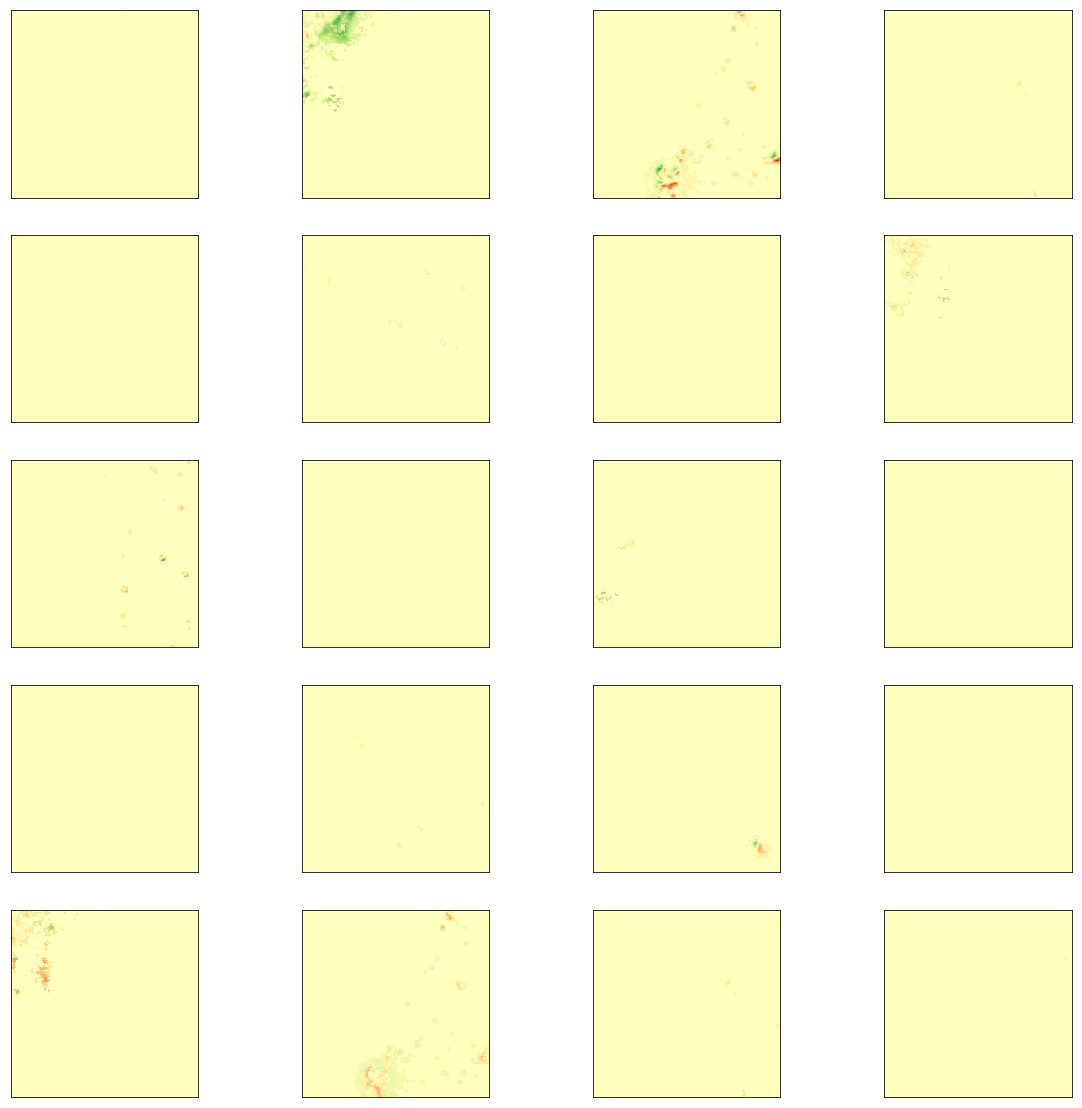

In [16]:
plot_series(series[2])

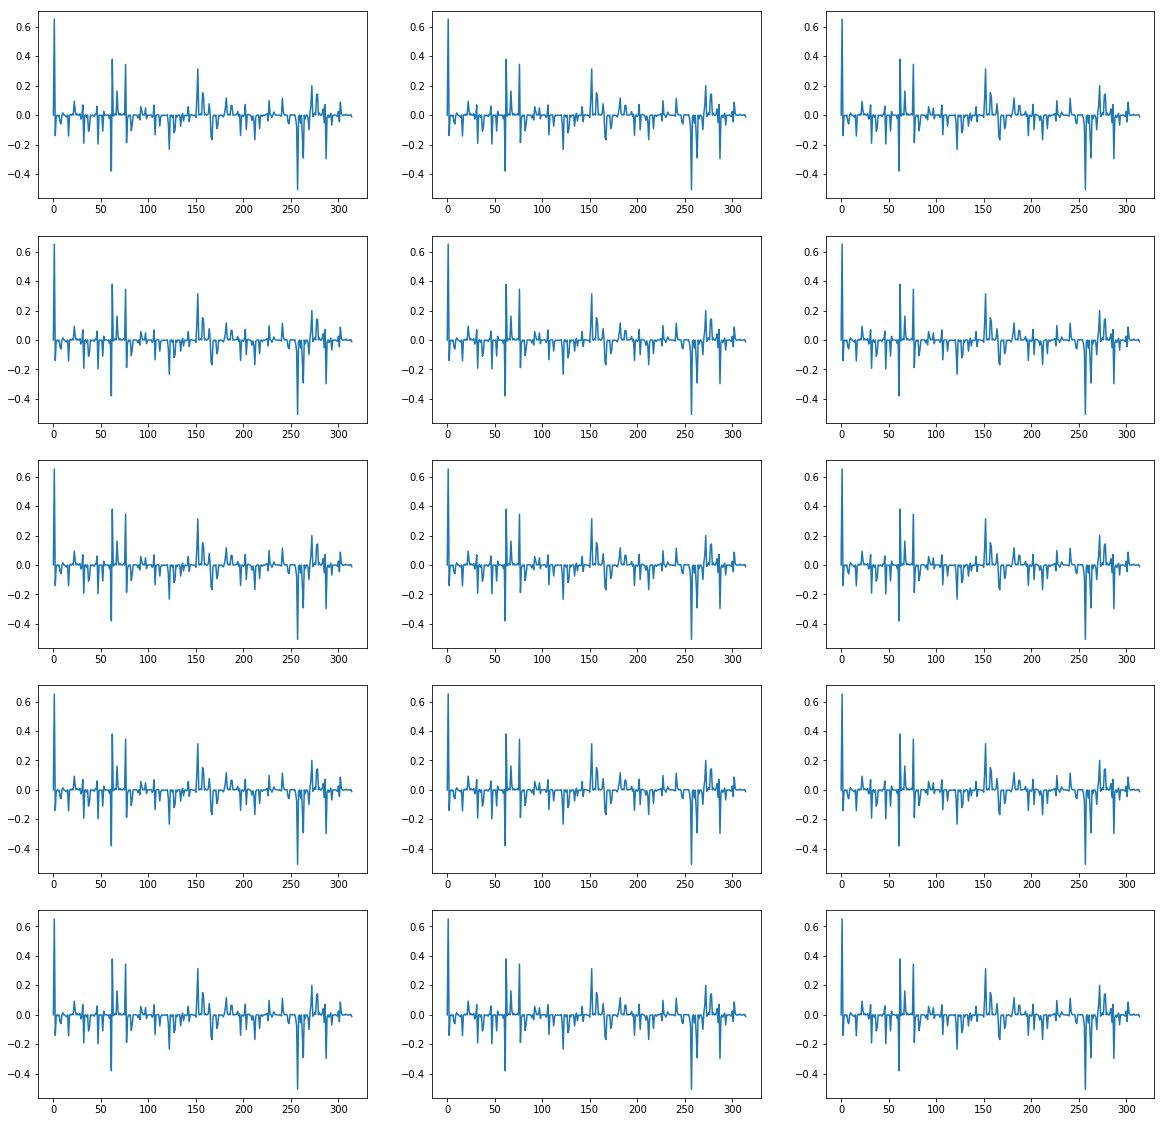

In [11]:
fig, ax = plt.subplots(5,3,figsize=(20,20))
for i, axi in enumerate(ax.flat):
    axi.plot(series[i].mean(axis=(1,2)))

plt.show()